In [6]:
import random
import math
import sys
import numpy as np
import matplotlib.pyplot as plt

## 1. Random Hill Climbing

Traveling Salesman Problem (TSP). The dataset used is a simple graph with 6 nodes (cities)

In [2]:
cities = ['A', 'B', 'C', 'E', 'M', 'S']

# Represent the Graph as a dictionary of dictionaries
A = {'A':0, 'B':10, 'C':15, 'E':14, 'M':11, 'S':10}
B = {'A':10, 'B':0, 'C':8, 'E':13 ,'M':15 ,'S':9}
C = {'A':15, 'B':8, 'C':0, 'E':11,'M':16,'S':10}
E = {'A':14, 'B':13, 'C':11, 'E':0,'M':9,'S':6}
M = {'A':11, 'B':15, 'C':16, 'E':9,'M':0,'S':9}
S = {'A':10, 'B':9, 'C':10, 'E':6,'M':9,'S':0}
Graph = {'A':A, 'B':B, 'C':C, 'E':E, 'M':M, 'S':S}


# Compute the total distance travelled to complete a cycle
# start from a city and visit every city and return to the same city
# Input: A path e.g. C-A-M-S-B-E as a list
def total_distance(path):
    distance = 0
    for i in range(1, len(path)):
        # add the distance between two adjacent cities
        distance += Graph.get(path[i-1]).get(path[i])
    
    # finally add the distance to the first city from the last city
    distance += Graph.get(path[i]).get(path[0])
    return distance

# swap neighbourhood structure
# Given a path two randomly chosen cities are swapped 
def swap_neighbour(path):
    two_cities = random.sample(path, 2)
    # find the position of the two cities in the path
    pos_city1 = path.index(two_cities[0])
    pos_city2 = path.index(two_cities[1])
    
    # Now swap the two cities in the path
    new_path = list(path)
    new_path[pos_city1] = two_cities[1]
    new_path[pos_city2] = two_cities[0]
    
    return new_path


Iteration: 0, Best solution: C-B-A-S-M-E, Best Fit: 57
Iteration: 1 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 2 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 3 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 4 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 5 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 6 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 7 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 8 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 9 Best solution: C-B-A-S-M-E Best Fit: 57
Iteration: 10 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 11 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 12 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 13 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 14 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 15 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 16 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 17 Best solution: C-B-A-M-S-E Best Fit: 55
Iteration: 18 Best solution: C-B-A-M

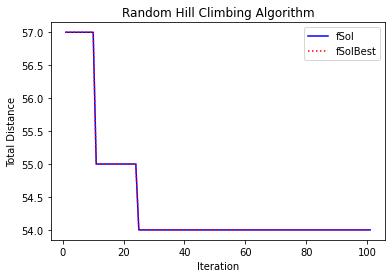

In [3]:
# Initialization
MaxIter = 100

# Initial solution construction phase
# Generate an initial solution at random
# Note that the solution is represented as a sequence of cities (a path not a cycle)
sol = random.sample(cities, 6)
fsol = total_distance(sol)
solbest = sol
fsolbest = fsol

# keep a list of fsol and fsolbest for plotting
y_fsol = [fsol]
y_fsolbest = [fsolbest]
print("Iteration: 0, Best solution: " + '-'.join(solbest) + ", Best Fit: " + str(fsolbest))

# Improvement phase
for iteration in range(MaxIter):
    # generate a new solution by a swap neighbourhood structure
    new_sol = swap_neighbour(sol)
    f_new_sol = total_distance(new_sol)
    
    if f_new_sol < fsol:
        sol = new_sol
        fsol = f_new_sol
    
        if f_new_sol < fsolbest:
            solbest = new_sol
            fsolbest = f_new_sol
    
    # Add to the list for plotting
    y_fsol.append(fsol)
    y_fsolbest.append(fsolbest)
    
    print("Iteration: " + str(iteration+1) + " Best solution: " + '-'.join(solbest) + " Best Fit: "+str(fsolbest))    

print("Best solution: " + '-'.join(solbest))
print("Shortest Distance: " + str(fsolbest))

# Plotting in matplotlib
x = range(1, MaxIter+2)
plt.plot(x, y_fsol, 'b', label='fSol')
plt.plot(x, y_fsolbest, ':r', label='fSolBest')
plt.xlabel('Iteration')
plt.ylabel('Total Distance')
plt.title('Random Hill Climbing Algorithm')
plt.legend()
plt.show()



## 2. Simulated Annealing

Traveling Salesman Problem (TSP). The dataset used is a simple graph with 6 nodes (cities)

Iteration: 0, Best solution: S-M-A-B-E-C, Best Fit: 64
Iteration: 1 Best solution: S-B-A-M-E-C Best Fit: 60
Iteration: 2 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 3 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 4 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 5 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 6 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 7 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 8 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 9 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 10 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 11 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 12 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 13 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 14 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 15 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 16 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 17 Best solution: C-B-A-M-E-S Best Fit: 54
Iteration: 18 Best solution: C-B-A-M

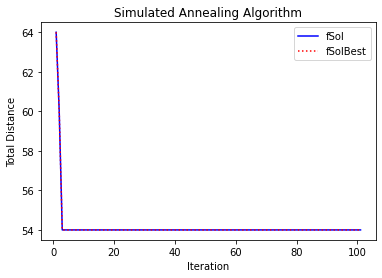

In [4]:
# Initialization
T0 = 0.95
Tf = 0.1
MaxIter = 100
Delta = (T0 - Tf)/MaxIter
T = T0

# Initial solution construction phase
# Generate an initial solution at random
# Note that the solution is represented as a sequence of cities (a path not a cycle)
sol = random.sample(cities, 6)
fsol = total_distance(sol)
solbest = sol
fsolbest = fsol

# keep a list of fsol and fsolbest for plotting
y_fsol = [fsol]
y_fsolbest = [fsolbest]
print("Iteration: 0, Best solution: " + '-'.join(solbest) + ", Best Fit: " + str(fsolbest))

# Improvement phase
for iteration in range(MaxIter):
    # generate a new solution by a swap neighbourhood structure
    new_sol = swap_neighbour(sol)
    f_new_sol = total_distance(new_sol)
    
    if f_new_sol < fsol:
        sol = new_sol
        fsol = f_new_sol
    
        if f_new_sol < fsolbest:
            solbest = new_sol
            fsolbest = f_new_sol
    else:
        c = f_new_sol - fsol
        # generate a random number in [0,1]
        r = random.random()
        
        if math.exp(-c/T) > r:
            sol = new_sol
            fsol = f_new_sol
        
    # Update T
    T -= Delta
    
    # Add to the list for plotting
    y_fsol.append(fsol)
    y_fsolbest.append(fsolbest)
    
    print("Iteration: " + str(iteration+1) + " Best solution: " + '-'.join(solbest) + " Best Fit: "+str(fsolbest))    

print("Best solution: " + '-'.join(solbest))
print("Shortest Distance: " + str(fsolbest))

# Plotting in matplotlib
x = range(1, MaxIter+2)
plt.plot(x, y_fsol, 'b', label='fSol')
plt.plot(x, y_fsolbest, ':r', label='fSolBest')
plt.xlabel('Iteration')
plt.ylabel('Total Distance')
plt.title('Simulated Annealing Algorithm')
plt.legend()
plt.show()



Clearly Simulated Annealing converges much faster than random hill climbing algorithm!

## 3. Genetic Algorithm
Discrete Curve fitting

Fitting polynomial functions to curves where the parameters can take discrete values

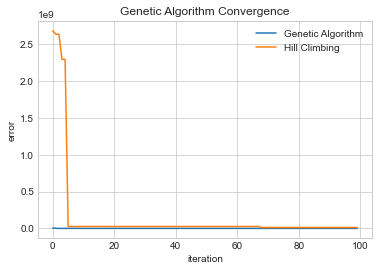

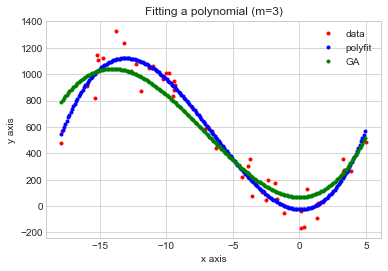

In [22]:
# # Discrete Curve Fitting with Genetic Algorithm
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

noise_scale = 100
n_samples = 50
X = np.array(25 * (np.random.rand(n_samples) - 0.8))
Y = X**3 + 20*X**2 + 5*X + noise_scale*np.random.randn(n_samples)

# fit a 3rd order degree polynomial
m = 3
p, res, rank, sing, rcond = np.polyfit(X, Y, m, full=True)

# find y values for the fitted polynomial
X1 = np.arange(min(X), max(X), 0.1)
Y1 = p[0]*X1**3 + p[1]*X1**2 + p[2]*X1 + p[3]


def eval_poly(p, x):
    '''
    Given a parameter vector p and a value x, calculate y
    y = p[0] + p[1]*x + p[2]*x^2 + ...
    Should return a vector if x is a vector
    '''
    return np.sum([p[i] * x**(len(p)-i-1) for i in range(len(p))], axis=0)


def compute_error(p):
    y = eval_poly(p, X)
    return sum((Y-y)**2)


# ### Genetic Algorithm

# We fit a 3rd degree polynomial (hence 4 parameters)
# We keep a population of 100 integers
population = np.round(np.random.rand(100, 4) * 10, 2)
# also keep a random solution for hill climbing
random_solution = np.round(np.random.rand(4) * 10, 2)
random_best = compute_error(random_solution)
random_fit = []

fit = []
N = 100
for iteration in range(N):
    
    # Compute fit (badness) as (predicted - actual)^2 for each one of 100 
    badness = [compute_error(pop) for pop in population]
    fit.append(min(badness))
    
    # Pick top 20 with the least badness of fit
    n = 20
    topn = population[np.argsort(badness)[:n]]

    # Cross Over Operation: Arthmetic crossover (a*x + (1-a)*y)
    a = 0.5
    # we'll pick two vectors randomly 
    crossed = []
    for i in range(100-n):
        # sample 2 indices
        indices = np.random.choice(range(n), 2, replace=False)
        parent1 = topn[indices[0]]
        parent2 = topn[indices[1]]
        # crossover
        child = np.round(a*parent1 + (1-a)*parent2, 2)
        crossed.append(child)

    # Set the new population
    population = np.vstack([topn, np.array(crossed)])

    # Mutation; pick any one of the index and multiply by a number in [0, 2]
    for k in range(len(population)):
        r = np.random.choice(population.shape[1])
        population[k][r] *= np.round(3*np.random.rand(), 2)

    
    # Randomized Hill climbing
    random_solution = np.round(np.random.rand(4) * 10, 2)
    new_f = compute_error(random_solution)
    if new_f < random_best:
        random_best = new_f
    random_fit.append(random_best)

plt.plot(list(range(N)), fit, label="Genetic Algorithm")
plt.plot(list(range(N)), random_fit, label="Hill Climbing")
plt.xlabel('iteration')
plt.ylabel('error')
plt.title('Genetic Algorithm Convergence')
plt.legend()
plt.show()


best_p = topn[0]

# plot

# find y values for the best polynomial (polyfit)
X1 = np.arange(min(X), max(X), 0.1)
Y1 = p[0]*X1**3 + p[1]*X1**2 + p[2]*X1 + p[3]
Y2 = best_p[0]*X1**3 + best_p[1]*X1**2 + best_p[2]*X1 + best_p[3]

plt.plot(X, Y, 'r.', label='data')
plt.plot(X1, Y1, 'b.', label='polyfit')
plt.plot(X1, Y2, 'g.', label='GA')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Fitting a polynomial (m=3)')
plt.legend()
plt.show()



In [21]:
random_solution.shape

(1, 4)

## 4. MIMIC (Mutual Information Maximizing Input Clustering)
Graph coloring: Scheduling m students to n panels

In [7]:
#!/usr/bin/env python
# coding: utf-8
panels = [['A1', 'A2', 'A3'], ['A1', 'A2', 'A3'], ['A3', 'A4', 'A5'], ['A6', 'A7', 'A8'], ['A6', 'A7', 'A8'], 
          ['A9', 'A10', 'A11'], ['A8', 'A9', 'A10'], ['A12', 'A13', 'A10'], ['A12', 'A13', 'A14'], 
          ['A12', 'A13', 'A7']]

supervisors = ['A8', 'A5', 'A6', 'A1', 'A4', 'A2', 'A3', 'A4', 'A10', 'A11']

# Number of students
nS = len(supervisors)

# Create conflict Graph G1 based on panels
# The nodes of the Graph are the students
# Add an edge between two nodes if there is a conflict in panles
# i.e. atleast a faculty is in the panel of both the students
# Given two panels find if there is a common faculty in both panels
def conflict1(panel1, panel2):
    return 1 if len(set(panel1) & set(panel2)) > 0 else 0

# We represent the Graph as an adjacency matrix
G1 = [[conflict1(panel, p) for p in panels ] for panel in panels]
# Remove self loop edges
for i in range(nS):
    G1[i][i] = 0

# Compute degree of each node/vertex
# degree is the number of adjacent nodes
deg1 = [sum(x) for x in G1]

# Next we create another conflict Graph G2 based on Supervisors
# Note that a Supervisor attending their student's presentation is not mandatory
# But we want to reduce the penalty of supervisors not attending 
# The nodes of the graph are again Students
# Add an edge between two students if the supervisor of first student is in the panel of the second student
def conflict2(supervisor, panel):
    return 1 if supervisor in panel else 0

G2 = [[conflict2(supervisor, panel) for panel in panels] for supervisor in supervisors]


# Graph Coloring of G1
# Graph coloring using Recursive-Large-First (RLF) algorithm

# Initially set color of all nodes as 0 (no color)
colors = [0 for k in supervisors]
current_color = 0

# Find all non-neighbours of current color which are not yet colored
def findNN():
    return [i for i in range(nS) if current_color not in [colors[j] for j in range(nS) if G1[i][j]] and colors[i]==0]
    
# count common neighbours of node with current color
# i.e. How many neighbours of node has a neighbour with color=current_color
def countCN(node):
    # Find neighbours of node which are not colored
    N = [n for n in range(nS) if G1[node][n] and colors[n]==0]
    common = [1 if current_color in [colors[j] for j in range(nS) if G1[i][j]] else 0 for i in N]
    return sum(common)


# Graph Coloring begins 
# Repeat until every node is colored
while(0 in colors):
    # Update the color
    current_color += 1
    # determine the node of maximal degree in G1 which is yet uncolored
    uncolored_deg = [0 if c>0 else d for c,d in zip(colors, deg1)] # Already colored nodes are set to 0 degree
    m = max(uncolored_deg)
    node = uncolored_deg.index(m) # index of maximum degree
    # color the chosen node
    colors[node] = current_color
    
    # Find all non-neighbours of current color
    # Non neighbours are eligible for current_color since there are no conflicts
    NN = findNN()
    # repeat until all Non Neighbours are colored
    while(len(NN)>0):
        # Find the non-neighbour with the maximum common neighbours to current color
        cn = [countCN(n) for n in NN]
        # pick the one in NN with highest cn
        # if all cn are zero, then graph G1 is disjoint
        # Then pick the node with highest degree from NN
        if sum(cn)==0:
            NN_deg = [0 if n not in NN else d for n,d in zip(range(nS),deg1)] 
            m = max(NN_deg)
            next_node = NN_deg.index(m) # index of maximum degree
        else:
            # select the node with the largest cn
            m = max(cn)
            next_node = NN[cn.index(m)]
        
        # color the next_node with the same current_color
        colors[next_node] = current_color
        # Update the Non-Neighbours list
        NN = findNN()


# Same color means there is no conflict and hence can be scheduled together
# First we have to check if scheduling is at all possible!!
# There are 6 slots/2 rooms and we have to schedule 10 students in it without conflicts 
unique_colors = list(set(colors))
count_colors = [sum([c==u for c in colors]) for u in unique_colors]
total_slots = sum([math.ceil(c/2) for c in count_colors])
if total_slots > 6:
    print("Sceduling without Panel Conflict is impossible")
    sys.exit(1)


# If Scheduling is possible, our objective is to minimize penalty
# First we look to reduce 2-penalty. i.e. Supervisor should be present as much as possible
# A matrix with 2-penalty of advisors not present if students Si and Sj are sheduled together
A2 = G2 + np.transpose(G2)

# Initialize 2 days schedules (6 slots) with empty (-1)
Days = [[-1,-1], [-1,-1], [-1,-1], [-1,-1], [-1,-1], [-1,-1]]

# Shedule all students with the same color and then move on to the next color and repeat
# randomly shuffle unique colors to produce different shedules each time
random.shuffle(unique_colors)

slot = 0
total_penalty2 = 0
for color in unique_colors:
    # Find which all nodes have this color
    nodes = [n for n in range(nS) if colors[n]==color]
    # Two students can be scheduled in the same slot (in different rooms)
    ncolor = math.ceil(len(nodes)/2)
    for i in range(ncolor):
        # Pick one of the students randomly
        chosen_node = random.choice(nodes)
        Days[slot][0] = chosen_node
        # remove the chosen node from nodes
        nodes.remove(chosen_node)
        
        # next we have to pick a node with same color with the least conflict in supervisors
        # to reduce 2-penalty
        if len(nodes)>0:
            penalty = [A2[chosen_node][n] for n in nodes]
            # pick the one with the lowest penalty
            second_node = nodes[penalty.index(min(penalty))]
            Days[slot][1] = second_node
            # remove second node also from nodes
            nodes.remove(second_node)
            # update 2-penalty
            total_penalty2 += min(penalty)
        
        # increment slot
        slot += 1


# Next we try to minimize idle slot penalty
# If Slot 1 and Slot 3 share some panel members, then they will be idle in Slot 2
# To remove this penalty, check if swapping Slot 2 & Slot 3 will help?

# compute idle slot penalty given two slots (in two rooms each)
def idle_penalty(slot1, slot3):
    s11 = slot1[0]
    s12 = slot1[1]
    s31 = slot3[0]
    s32 = slot3[1]
    penalty = conflict1(panels[s11], panels[s31])
    # if no empty slots in the second room
    if s12 > -1 and s32 > -1:
        penalty += conflict1(panels[s12], panels[s32])
    
    return penalty

# Day1
if idle_penalty(Days[0], Days[2]) > idle_penalty(Days[0], Days[1]):
    # swap 
    # print('swap')
    temp = Days[2]
    Days[2] = Days[1]
    Days[1] = temp

# Day2
if idle_penalty(Days[3], Days[5]) > idle_penalty(Days[3], Days[4]):
    # swap 
    # print(swap)
    temp = Days[5]
    Days[5] = Days[4]
    Days[4] = temp

    
# Compute total idle penalty
total_penalty1 = idle_penalty(Days[0], Days[2]) + idle_penalty(Days[3], Days[5])

# Print the final Schedule
print("Day 1\n")
i = 1
for slot in Days:
    print("Slot " + str(i))
    print("Room 1: Student " + str(slot[0] + 1))
    if slot[1] > -1:
        print("Room 2: Student " + str(slot[1] + 1))
    else:
        print("Room 2: Empty")
    
    print("\n")
    
    i += 1
    if i == 4:
        print("Day 2\n")

total_penalty = total_penalty1 + total_penalty2 * 2
print("Total penalty = " + str(total_penalty))


Day 1

Slot 1
Room 1: Student 1
Room 2: Student 10


Slot 2
Room 1: Student 7
Room 2: Empty


Slot 3
Room 1: Student 6
Room 2: Student 3


Day 2

Slot 4
Room 1: Student 5
Room 2: Student 9


Slot 5
Room 1: Student 4
Room 2: Empty


Slot 6
Room 1: Student 8
Room 2: Student 2


Total penalty = 0
